# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
sns.set_style="darkgrid"

In [4]:
data =pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


#### Data cleaning 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


the dataset has 10 columns, of diffent datatypes, and 3000 rows

In [8]:
data.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

no null values, the dataset is clean , we can proceed to analysis

# Exploratory Data Analysis and Visualization

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3000.0,2019.570333,2.857932,2015.0,2017.0000,2020.000,2022.00,2024.00
Financial Loss (in Million $),3000.0,50.492970,28.791415,0.5,25.7575,50.795,75.63,99.99
Number of Affected Users,3000.0,504684.136333,289944.084972,424.0,255805.2500,504513.000,758088.50,999635.00
Incident Resolution Time (in Hours),3000.0,36.476000,20.570768,1.0,19.0000,37.000,55.00,72.00


In [12]:
country = data.Country.value_counts()
country

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

UK recorded the highest number in cyber attacks, followed by India, Chine had the least number of recorded attacks

2018, recorded the highestnumber of attacks,followed by 2022. The least was 2016

In [15]:
data.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

### Univariate Visualization

Text(0, 0.5, ' count ')

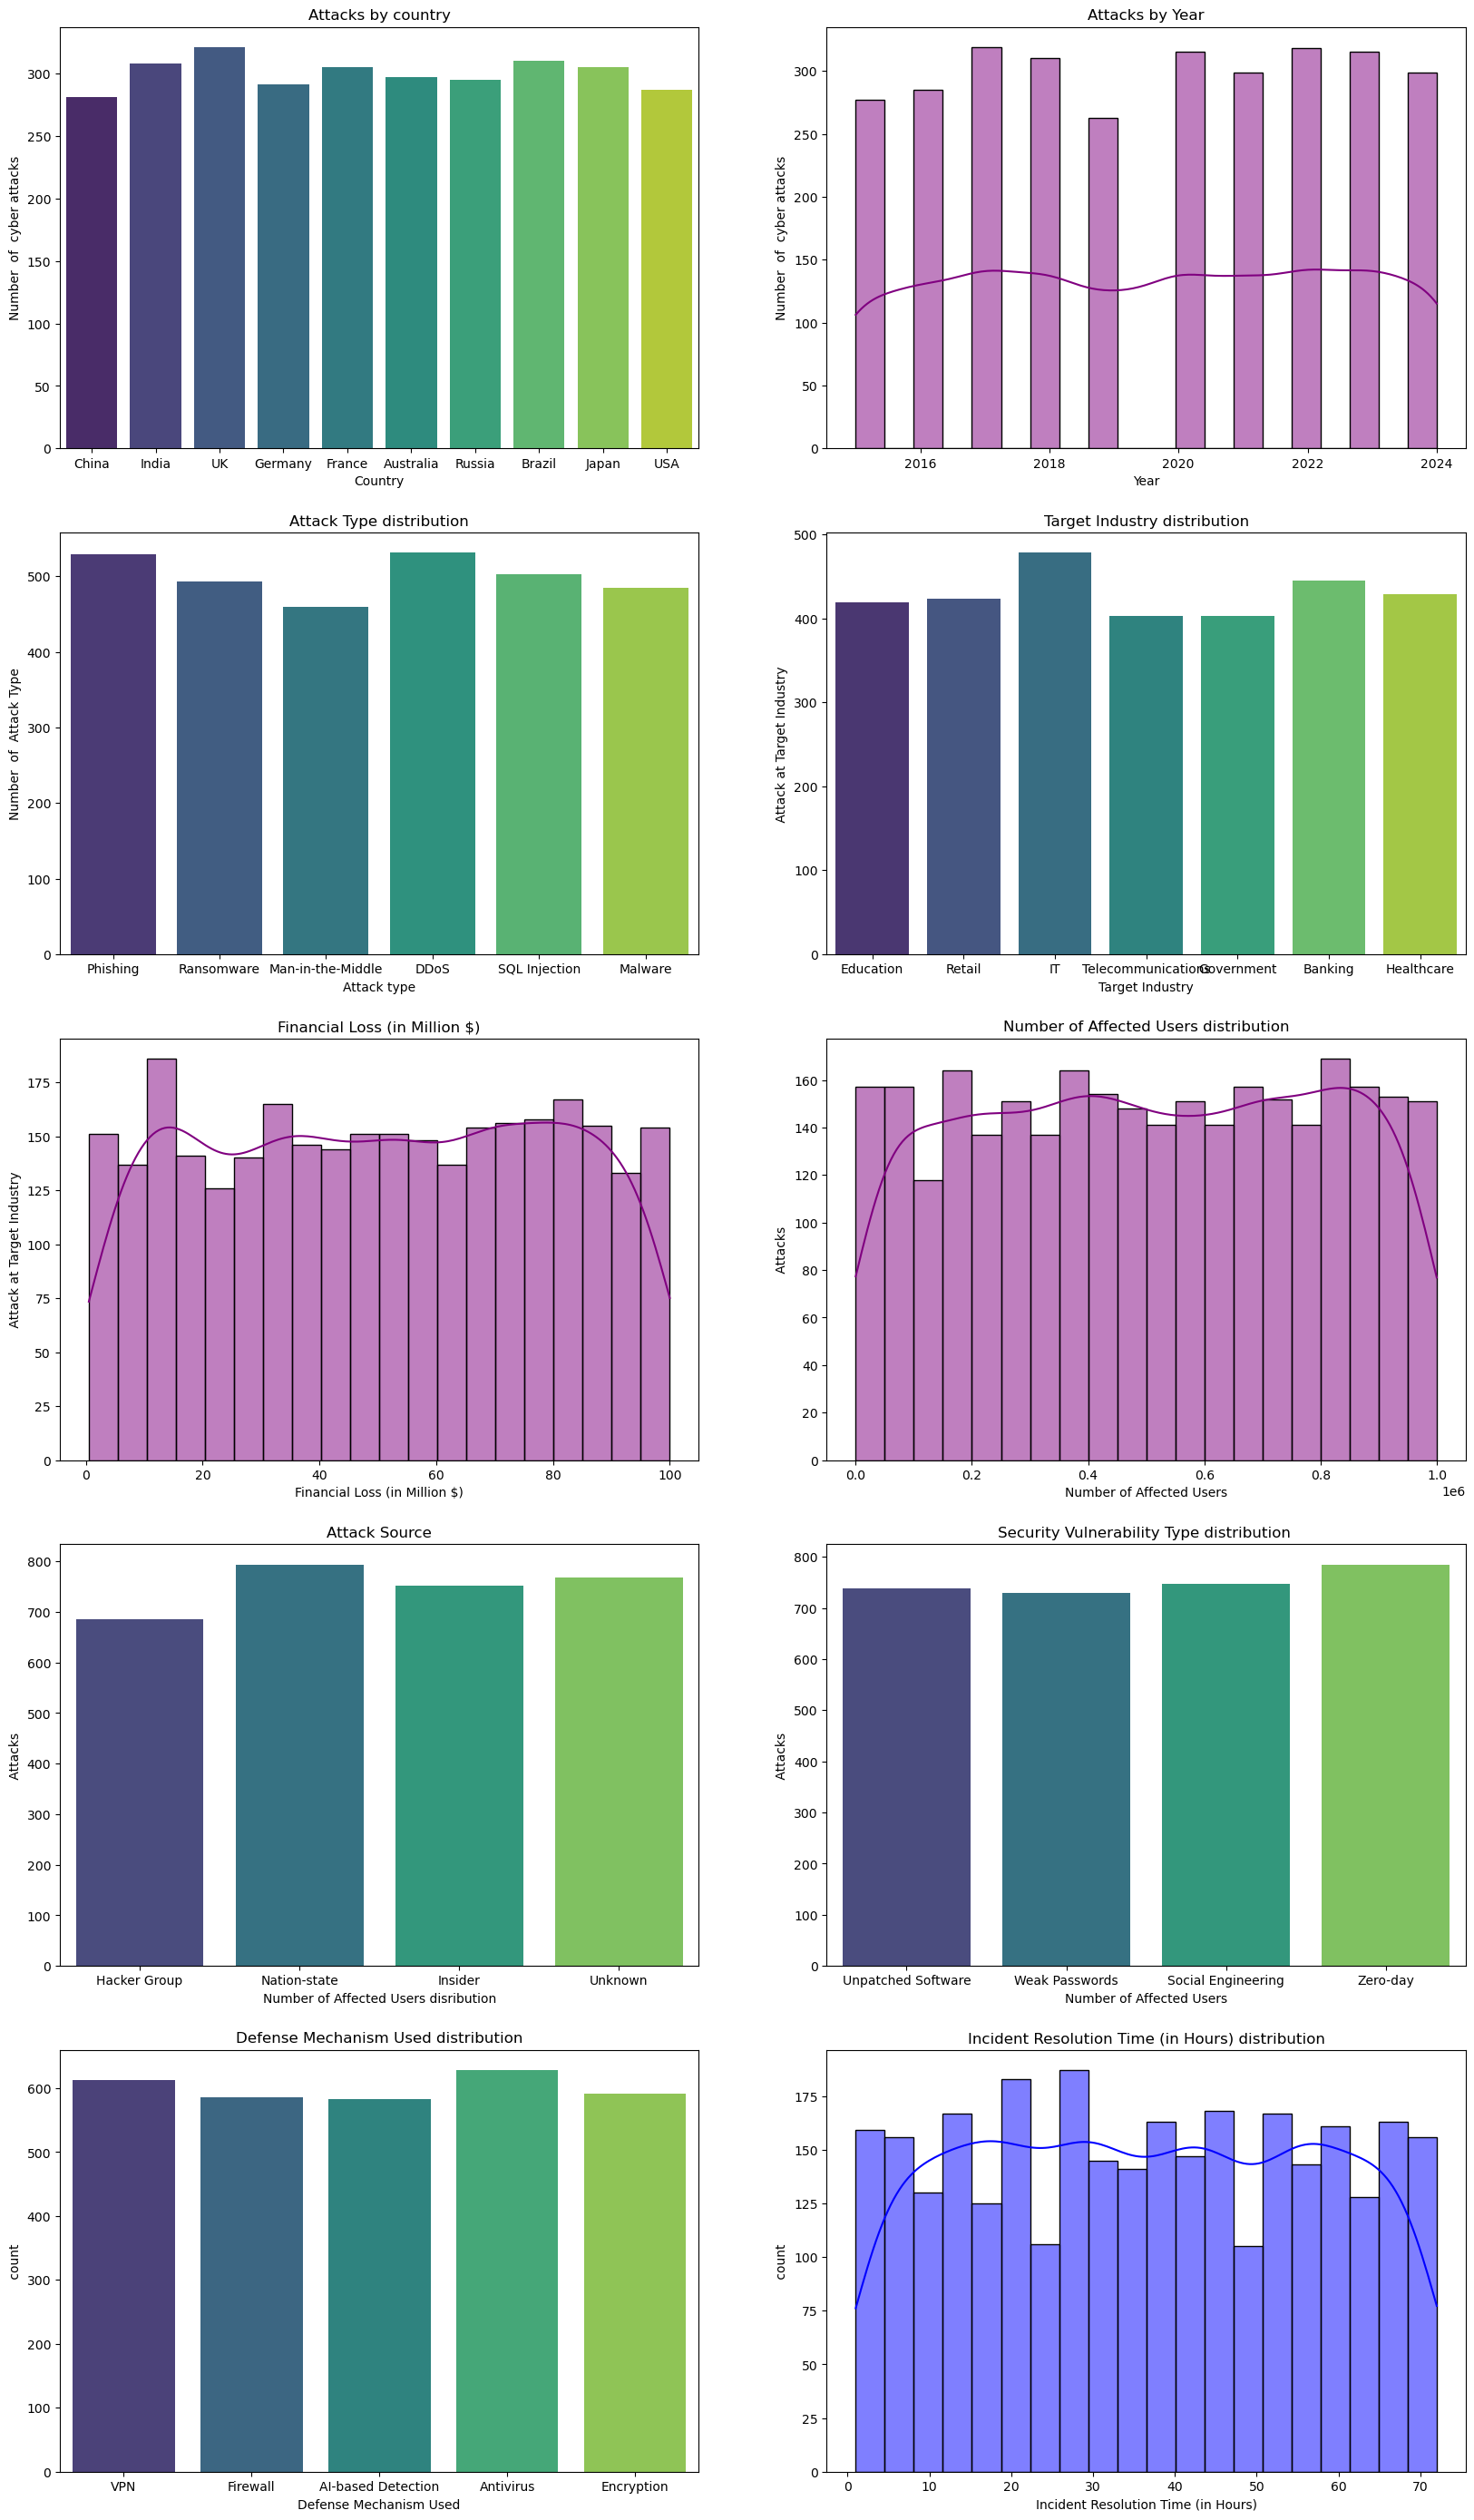

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(20, 35))
sns.countplot(x=data["Country"],ax=axes[0,0], palette="viridis", hue=data["Country"])
axes[0,0].set_title("Attacks by country")
axes[0,0].set_xlabel("Country")
axes[0,0].set_ylabel("Number  of  cyber attacks")

#Year
sns.histplot(data=data["Year"],ax=axes[0,1], kde=True,bins=20, color="purple")
axes[0,1].set_title("Attacks by Year")
axes[0,1].set_xlabel("Year")
axes[0,1].set_ylabel("Number  of  cyber attacks")

#attacke type 
sns.countplot(x=data["Attack Type"],ax=axes[1,0], palette="viridis", hue=data["Attack Type"])
axes[1,0].set_title("Attack Type distribution")
axes[1,0].set_xlabel("Attack type")
axes[1,0].set_ylabel("Number  of  Attack Type")

#target industry 
sns.countplot(x=data["Target Industry"],ax=axes[1,1], palette="viridis", hue=data["Target Industry"])
axes[1,1].set_title("Target Industry distribution")
axes[1,1].set_xlabel("Target Industry")
axes[1,1].set_ylabel(" Attack at Target Industry ")

#financial looss
sns.histplot(data=data["Financial Loss (in Million $)"],ax=axes[2,0], kde=True,bins=20, color="Purple")
axes[2,0].set_title("Financial Loss (in Million $)")
axes[2,0].set_xlabel("Financial Loss (in Million $)")
axes[2,0].set_ylabel(" Attack at Target Industry ")

#affected users
sns.histplot(data=data["Number of Affected Users"],ax=axes[2,1], kde=True,bins=20, color="Purple")
axes[2,1].set_title("Number of Affected Users distribution")
axes[2,1].set_xlabel("Number of Affected Users")
axes[2,1].set_ylabel(" Attacks ")        


#attacke source
sns.countplot(x=data["Attack Source"],ax=axes[3,0], palette="viridis", hue=data["Attack Source"])
axes[3,0].set_title("Attack Source")
axes[3,0].set_xlabel("Number of Affected Users disribution")
axes[3,0].set_ylabel(" Attacks ")   

#securiy vulenrabolity 
sns.countplot(x=data["Security Vulnerability Type"],ax=axes[3,1], palette="viridis", hue=data["Security Vulnerability Type"])
axes[3,1].set_title("Security Vulnerability Type distribution ")
axes[3,1].set_xlabel("Number of Affected Users")
axes[3,1].set_ylabel(" Attacks ")  

#Defense Mechanism Used
sns.countplot(x=data["Defense Mechanism Used"],ax=axes[4,0], palette="viridis", hue=data["Defense Mechanism Used"])
axes[4,0].set_title("Defense Mechanism Used distribution")
axes[4,0].set_xlabel("Defense Mechanism Used")
axes[4,0].set_ylabel(" count ")  

#Defense Mechanism Used
sns.histplot(data=data["Incident Resolution Time (in Hours)"],ax=axes[4,1], kde=True, color="blue", bins=20)
axes[4,1].set_title("Incident Resolution Time (in Hours) distribution")
axes[4,1].set_xlabel("Incident Resolution Time (in Hours)")
axes[4,1].set_ylabel(" count ")

- UK recorded the highest number of attacks with more than 300 attacks while china had the least
- 2017 had the highest number of attcaks, while 2-019 had the least 
- Phishing 500 and DoS, attacks were the most common attacks each with more than 500
- IT industry was the most attacked industry of all receicing more than 400 attacks
- Nation States led in source of attacks with more amost 800, while attacks from hacker groups were the least.
- Zero Day was the most exploited securioty vulnerability by attackers, while the reast had almost equal distribution
- Antivirus Portection was the most utilized defence mechanism m, followed by VPN,while AI based detection was the least


### Bivariate Visualization

Text(0, 0.5, 'Loss in Million')

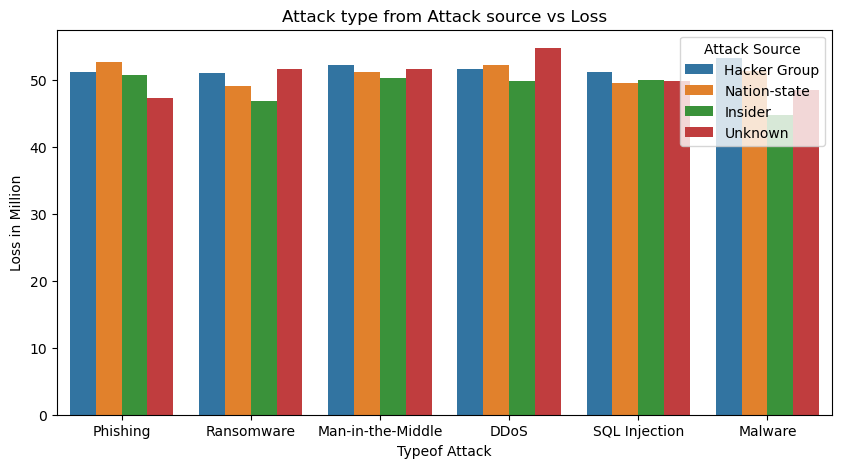

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=data["Attack Type"],y=data["Financial Loss (in Million $)"], hue=data["Attack Source"],errorbar=None)
plt.title("Attack type from Attack source vs Loss")
plt.xlabel("Typeof Attack")
plt.ylabel("Loss in Million")

The Attack that costed the most amount of financial loss of more about 99 millions dollars was Denial of Service Attacvk, and the source was Unknown

Text(0, 0.5, 'Loss in Million')

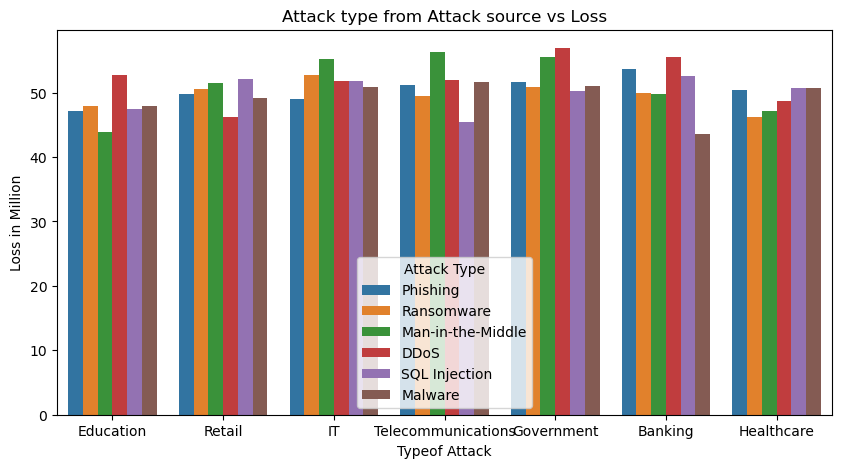

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=data["Target Industry"],y=data["Financial Loss (in Million $)"], hue=data["Attack Type"],errorbar=None)
plt.title("Attack type from Attack source vs Loss")
plt.xlabel("Typeof Attack")
plt.ylabel("Loss in Million")




In [23]:
le = LabelEncoder()
scaler=StandardScaler()
for columns in data.select_dtypes("object").columns:
    data[columns]  = le.fit_transform(data[columns])


In [24]:
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


In [25]:
data.corr()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
Country,1.000000,-0.030814,0.012968,0.011799,0.001085,-0.025464,-0.009616,-0.020376,0.022475,-0.019001
Year,-0.030814,1.000000,0.016694,0.023186,0.010581,0.002317,-0.002287,-0.002973,0.014233,-0.004982
Attack Type,0.012968,0.016694,1.000000,-0.018451,-0.018050,0.002830,0.034120,0.001957,0.002684,0.008990
Target Industry,0.011799,0.023186,-0.018451,1.000000,0.005423,-0.012997,0.006918,0.015490,-0.006848,0.017954
Financial Loss (in Million $),0.001085,0.010581,-0.018050,0.005423,1.000000,0.001787,-0.004089,-0.004783,-0.011496,-0.012671
Number of Affected Users,-0.025464,0.002317,0.002830,-0.012997,0.001787,1.000000,-0.012174,0.014112,-0.002761,0.005893
Attack Source,-0.009616,-0.002287,0.034120,0.006918,-0.004089,-0.012174,1.000000,0.037778,-0.005392,-0.017813
Security Vulnerability Type,-0.020376,-0.002973,0.001957,0.015490,-0.004783,0.014112,0.037778,1.000000,-0.010620,-0.020345
Defense Mechanism Used,0.022475,0.014233,0.002684,-0.006848,-0.011496,-0.002761,-0.005392,-0.010620,1.000000,-0.002180
Incident Resolution Time (in Hours),-0.019001,-0.004982,0.008990,0.017954,-0.012671,0.005893,-0.017813,-0.020345,-0.002180,1.000000


### Creating a model to predict the amount of Financial loss inquired , depending on the attack 

since it is a continous value, this will be a regression problem 

### Features Selection

In [29]:
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


In [30]:
data1 = data.copy()

In [31]:
data1.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


In [32]:
X  = data.drop(columns=["Financial Loss (in Million $)"])
y = data["Financial Loss (in Million $)"]

In [33]:
X.shape

(3000, 9)

In [34]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

### Data Splitting

In [36]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.7)

In [37]:
models = {
    "Linear Regression":LinearRegression(),
    "Support Vector Machine":SVR(),
    "Random Forest":RandomForestRegressor(n_estimators=100, random_state=42),
    "DecisionTree":DecisionTreeRegressor(),
}

results_regression = []
for name,model in models.items():
    start_time = time.time()
    model.fit(X_scaled_train,y_train)
    pred = model.predict(X_scaled_test)
    end_time = time.time()
   
    elapsed_time = start_time-end_time
    r2 = r2_score(y_test,pred)*100
    results_regression.append({
        "Model":name,
        "R2_score":r2,
        "Time":elapsed_time
    })
    data_results_regression = pd.DataFrame(results_regression)
    print(data_results_regression)

               Model  R2_score      Time
0  Linear Regression -1.221167 -0.134438
                    Model  R2_score      Time
0       Linear Regression -1.221167 -0.134438
1  Support Vector Machine -1.063241 -0.674223
                    Model  R2_score      Time
0       Linear Regression -1.221167 -0.134438
1  Support Vector Machine -1.063241 -0.674223
2           Random Forest -6.050042 -1.389122
                    Model    R2_score      Time
0       Linear Regression   -1.221167 -0.134438
1  Support Vector Machine   -1.063241 -0.674223
2           Random Forest   -6.050042 -1.389122
3            DecisionTree -102.711740 -0.019908
